In [1]:
%pylab inline

import os, sys
import scipy
import helpers as h
from glob import glob
from scipy.io import loadmat
from scipy.sparse.linalg import eigsh
from mpl_toolkits import mplot3d
from scipy.stats import skewnorm 
from scipy.stats import skew, kurtosis
import matplotlib.gridspec as Gridspec

plt.rcParams['figure.figsize'] = (15, 5) 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
def abib_cdf(r, r_min = -np.inf, **kwargs):
    r_kept = r[r>r_min]
    lenr = len(r)
    lenr_kept = len(r_kept)
    print(f"Dropped {lenr - lenr_kept} values less than {r_min=}")
    x = sorted(r_kept)
    y = arange(1, len(r_kept)+1)/(len(r_kept))
    plot(x,y, **kwargs)
    xlabel("Samples"); ylabel("Cumulative Probability")
    return r_kept

def get_parameters_skew(data):
    """function return the shape(sh), scale (sc) and location (loc),
       parameters for a skewed gaussian, given a data set.
       It computes the mean, skewness and variance of the dataset then finds
       these skew gaussian parameters in terms of these.
    """
    mu = mean(data)
    s= skew(data)
    v = var(data)
    c = ((4 - pi)/2) * sqrt(2/pi)**3
    r = (2/pi) * (cbrt(s/c))**2
    k = (2/pi) * (1 - r)
    q = 1.0/(1 - k)
    scale2 = v*r
    sc = sqrt(scale2) 
    loc = mu + sqrt(scale2)* (sqrt(k*2/pi))
    sh =  sqrt(q-1) 
    
    return sc, sh, loc

In [3]:
data_root = "/Users/duuta/ppp/data/stringer/"
data_files = [fname.split("/")[-1] for fname in glob(f"{data_root}natimg2800_M*.mat")]
# data_files

In [4]:
data = loadmat(os.path.join(data_root, data_files[1])
               ,simplify_cells = True) 

In [5]:
spont = data['stim']['spont']
resp = data['stim']['resp']

Dropped 2684 values less than r_min=-2


/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_41000/965960651.py:1: RuntimeWarning: divide by zero encountered in log10
  r_kept = abib_cdf(log10(resp[0]), r_min=-2);


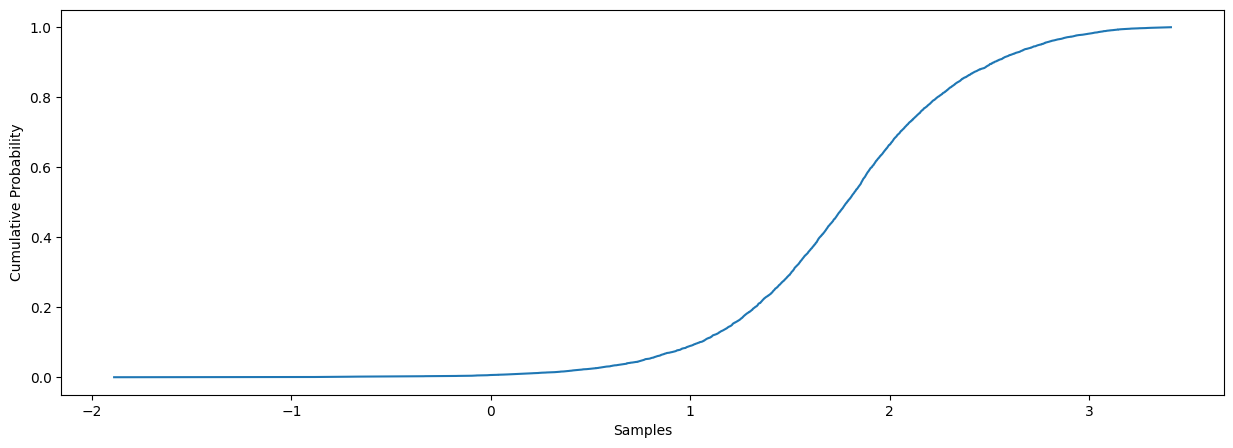

In [7]:
r_kept = abib_cdf(log10(resp[0]), r_min=-2)

In [8]:
sc, sh, loc = get_parameters_skew(r_kept)

In [9]:
sk0= skewnorm.rvs(a=-0.3648, loc=loc, scale=sc, size=1000)

Dropped 0 values less than r_min=-inf
Dropped 0 values less than r_min=-inf


Text(0.5, 1.0, 'Fitting Skew Gaussian to Response')

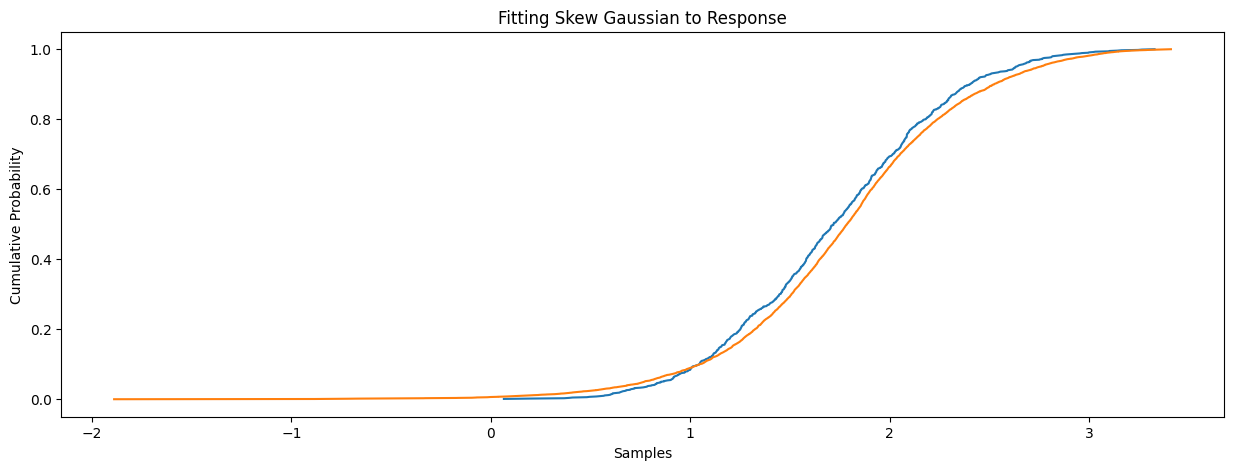

In [11]:
abib_cdf(sk0, label='fit')
abib_cdf(r_kept, label='data');
title("Fitting Skew Gaussian to Response")